In [76]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
     |████████████████████████████████| 4.3 MB 57.0 MB/s 
     |████████████████████████████████| 181 kB 76.3 MB/s 
     |████████████████████████████████| 77 kB 8.0 MB/s 
     |████████████████████████████████| 111 kB 71.0 MB/s 
     |████████████████████████████████| 164 kB 60.6 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 131 kB 77.9 MB/s 
     |████████████████████████████████| 793 kB 55.9 MB/s 
     |████████████████████████████████| 130 kB 78.9 MB/s 
     |████████████████████████████████| 428 kB 67.0 MB/s 
     |████████████████████████████████| 381 kB 60.0 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=2904a346b1afbc4dde0429d1b0f768503ebbdd9638a00019dd1d80835f0f98e9
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df7

In [1]:
!git clone "https://github.com/DarekarA/TwitterSentimentAnalysis_Public"

Cloning into 'TwitterSentimentAnalysis_Public'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [9]:
consumer_key = "LCJb3Az13xhbgTeCZot9CWTpb"
consumer_secret = "FMSqPuZge97VsulN0VB7m5Guzq2ilpx1RaewoOqOUK1tolYixx"
access_token = "716579905643778049-fnicBcRaweSEveBec7hzc71x588Z5Kp"
access_token_secret = "PYkyjC3iXc7kqpcNWxV5C8lOAh2XCjRvEv0g972gDeEDx"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [10]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)


Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [11]:
def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic, tweet_mode = 'extended', count=Count, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.full_text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [12]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["Marvel"]
get_tweets(Topic , Count=3000)

In [13]:
df.head(20)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2022-06-02 14:15:50,Sibre Collard,False,@FM_Marvel_Girl It's Bill Cosby all over again.,0,0,"Bethlehem, PA"
1,2022-06-02 14:15:45,(Ꮇᴀᴅʜᴜ ӃᎪᏞϒᎪƝ) 🦅™,False,@tarnetino @_brandichan_ Here comes the Marvel...,0,0,TUNI
2,2022-06-02 14:15:45,Mr J ⚡️🦇🧜‍♂️🏹,False,@Marvel @MarvelUnlimited Man what have they do...,0,0,Gotham
3,2022-06-02 14:15:36,Farseerxxx✞†֎,False,He's quickly becoming my favourite marvel hero...,0,0,"Alethkar, Roshar"
4,2022-06-02 14:15:20,sil,False,ke marvel exhibition yuk :(,0,0,
5,2022-06-02 14:15:20,Yeudi,False,Istg if they #RestoreTheSnyderVerse i will sto...,0,0,
6,2022-06-02 14:15:15,Christophe Braem,False,@OnlyOneBCollins @marvel_jam @ScorpioOfficial ...,0,0,Belgium
7,2022-06-02 14:15:05,Sean Mukherjee,False,@NeilMukherjeeUK @MarvelStudios @DisneyStudios...,0,0,"Oxford, England, UK."
8,2022-06-02 14:14:59,Disney+ Thoughts 📱,False,Y’all I’ve been so busy. I haven’t started Obi...,0,0,
9,2022-06-02 14:14:59,-__---___---___🌱🥩🇺🇲🏃‍♂️🏋️🎞️,False,@mara94345 Dc and marvel Comic books written a...,0,0,


In [14]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [15]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [16]:
def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [17]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2022-06-02 14:15:50,Sibre Collard,False,@FM_Marvel_Girl It's Bill Cosby all over again.,0,0,"Bethlehem, PA",marvel girl it s bill cosby all over again
1,2022-06-02 14:15:45,(Ꮇᴀᴅʜᴜ ӃᎪᏞϒᎪƝ) 🦅™,False,@tarnetino @_brandichan_ Here comes the Marvel...,0,0,TUNI,brandichan here comes the marvel fan
2,2022-06-02 14:15:45,Mr J ⚡️🦇🧜‍♂️🏹,False,@Marvel @MarvelUnlimited Man what have they do...,0,0,Gotham,man what have they done to my boi they finally...
3,2022-06-02 14:15:36,Farseerxxx✞†֎,False,He's quickly becoming my favourite marvel hero...,0,0,"Alethkar, Roshar",he s quickly becoming my favourite marvel hero
4,2022-06-02 14:15:20,sil,False,ke marvel exhibition yuk :(,0,0,,ke marvel exhibition yuk


In [18]:
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-06-02 14:15:50,Sibre Collard,False,@FM_Marvel_Girl It's Bill Cosby all over again.,0,0,"Bethlehem, PA",marvel girl it s bill cosby all over again,Neutral
1,2022-06-02 14:15:45,(Ꮇᴀᴅʜᴜ ӃᎪᏞϒᎪƝ) 🦅™,False,@tarnetino @_brandichan_ Here comes the Marvel...,0,0,TUNI,brandichan here comes the marvel fan,Neutral
2,2022-06-02 14:15:45,Mr J ⚡️🦇🧜‍♂️🏹,False,@Marvel @MarvelUnlimited Man what have they do...,0,0,Gotham,man what have they done to my boi they finally...,Neutral
3,2022-06-02 14:15:36,Farseerxxx✞†֎,False,He's quickly becoming my favourite marvel hero...,0,0,"Alethkar, Roshar",he s quickly becoming my favourite marvel hero,Positive
4,2022-06-02 14:15:20,sil,False,ke marvel exhibition yuk :(,0,0,,ke marvel exhibition yuk,Negative


In [19]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 Marvel Studios: A Universe of Heroes Exhibition Indonesia Opens Today, Bringing 104 Days of Immersive Marvel Cinematic Universe Experience to Fans in Indonesia https://t.co/rYKL7zZ4rc

Clean tweet:
 marvel studios a universe of heroes exhibition indonesia opens today bringing 104 days of immersive marvel cinematic universe experience to fans in indonesia

Sentiment of the tweet:
 Neutral


In [20]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Marvel'] are : 3001
Total Positive Tweets are : 1483
Total Negative Tweets are : 499
Total Neutral Tweets are : 1019


In [21]:
df["Sentiment"].value_counts()

Positive    1483
Neutral     1019
Negative     499
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

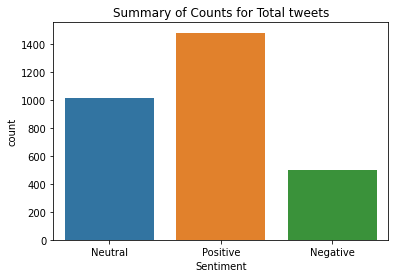

In [22]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

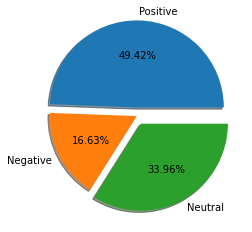

In [23]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

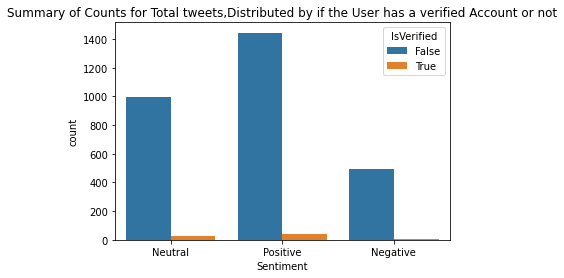

In [24]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

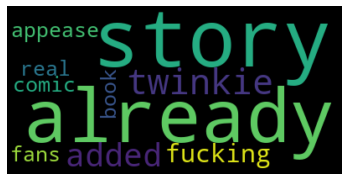

In [26]:
# Start with one review:

text = df.clean_tweet[10]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 354038 words in the combination of all review.


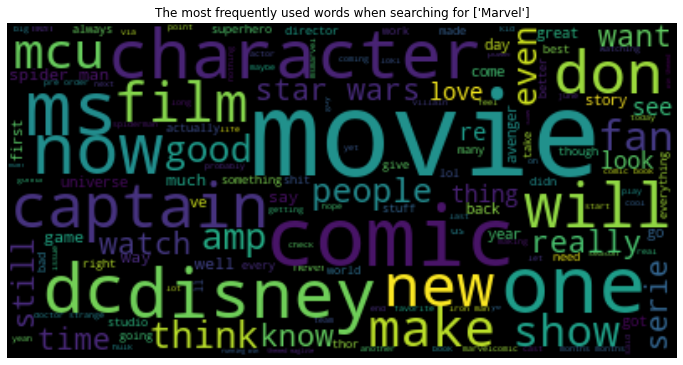

In [27]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

There are 354038 words in the combination of all review.


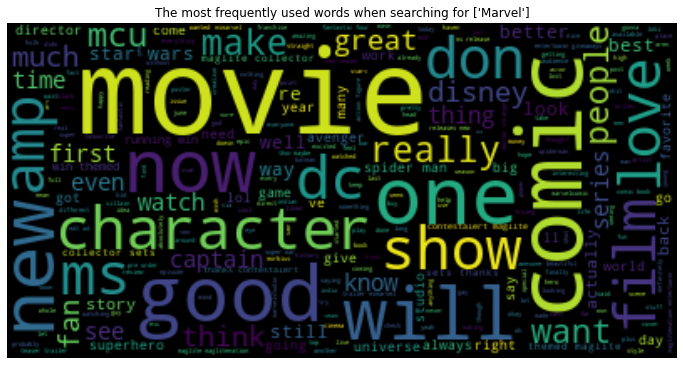

In [28]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

There are 354038 words in the combination of all review.


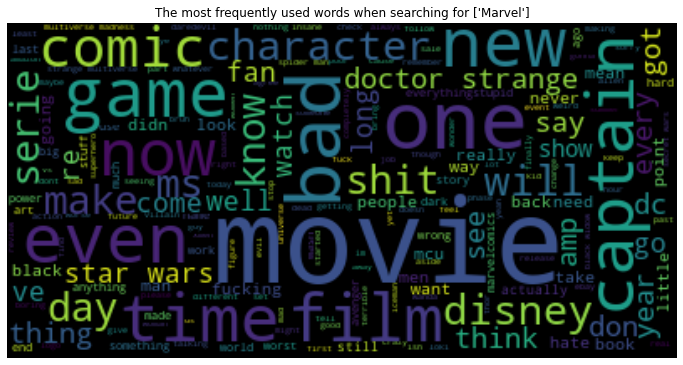

In [29]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

In [30]:
import streamlit as st 
from PIL import Image 
import os 
#os.chdir("F:/Machine Learning/AI ML/Case Studies/Flask/TwitterFromScratch") 
image = Image.open('/Logo1.jpg') 
st.image(image, caption='Sunrise by the mountains',use_column_width=True) 
st.pyplot()

2022-06-02 14:30:47.564 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

<Figure size 432x288 with 0 Axes>